In [7]:
from keras.datasets import mnist
from keras.models import Sequential, load_model
from keras.layers.core import Dense, Dropout, Activation
from keras.utils import np_utils

In [8]:
(X_train, y_train), (X_test, y_test) = mnist.load_data()

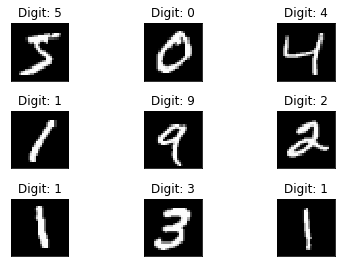

In [9]:
fig = plt.figure()
for i in range(9):
  plt.subplot(3,3,i+1)
  plt.tight_layout()
  plt.imshow(X_train[i], cmap='gray', interpolation='none')
  plt.title("Digit: {}".format(y_train[i]))
  plt.xticks([])
  plt.yticks([])

Text(0.5, 1.0, 'Pixel Value Distribution')

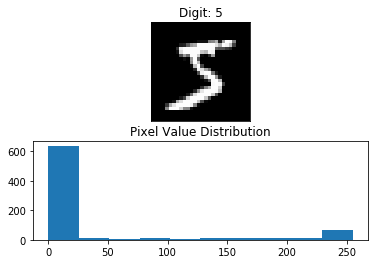

In [11]:
fig = plt.figure()
plt.subplot(2,1,1)
plt.imshow(X_train[0], cmap='gray', interpolation='none')
plt.title("Digit: {}".format(y_train[0]))
plt.xticks([])
plt.yticks([])
plt.subplot(2,1,2)
plt.hist(X_train[0].reshape(784))
plt.title("Pixel Value Distribution")

In [12]:
# let's print the shape before we reshape and normalize
print("X_train shape", X_train.shape)
print("y_train shape", y_train.shape)
print("X_test shape", X_test.shape)
print("y_test shape", y_test.shape)

# building the input vector from the 28x28 pixels
X_train = X_train.reshape(60000, 784)
X_test = X_test.reshape(10000, 784)
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')

# normalizing the data to help with the training
X_train /= 255
X_test /= 255

# print the final input shape ready for training
print("Train matrix shape", X_train.shape)
print("Test matrix shape", X_test.shape)

X_train shape (60000, 28, 28)
y_train shape (60000,)
X_test shape (10000, 28, 28)
y_test shape (10000,)
Train matrix shape (60000, 784)
Test matrix shape (10000, 784)


In [14]:
import numpy as np
print(np.unique(y_train, return_counts=True))

(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], dtype=uint8), array([5923, 6742, 5958, 6131, 5842, 5421, 5918, 6265, 5851, 5949]))


In [15]:
# one-hot encoding using keras' numpy-related utilities
n_classes = 10
print("Shape before one-hot encoding: ", y_train.shape)
Y_train = np_utils.to_categorical(y_train, n_classes)
Y_test = np_utils.to_categorical(y_test, n_classes)
print("Shape after one-hot encoding: ", Y_train.shape)

Shape before one-hot encoding:  (60000,)
Shape after one-hot encoding:  (60000, 10)


In [16]:
# building a linear stack of layers with the sequential model
model = Sequential()
model.add(Dense(512, input_shape=(784,)))
model.add(Activation('relu'))                            
model.add(Dropout(0.2))

model.add(Dense(512))
model.add(Activation('relu'))
model.add(Dropout(0.2))

model.add(Dense(10))
model.add(Activation('softmax'))

In [17]:
model.compile(loss='categorical_crossentropy', metrics=['accuracy'], optimizer='adam')

In [19]:
history = model.fit(X_train, Y_train,
          batch_size=128, epochs=10,
          verbose=2,
          validation_data=(X_test, Y_test))
import os
# saving the model
save_dir = "/results/"
model_name = 'keras_mnist.h5'
model_path = os.path.join(save_dir, model_name)
model.save(model_path)
print('Saved trained model at %s ' % model_path)

# plotting the metrics
fig = plt.figure()
plt.subplot(2,1,1)
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='lower right')

plt.subplot(2,1,2)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper right')

plt.tight_layout()

fig

Train on 60000 samples, validate on 10000 samples
Epoch 1/10
 - 15s - loss: 0.0129 - accuracy: 0.9956 - val_loss: 0.0969 - val_accuracy: 0.9817
Epoch 2/10
 - 15s - loss: 0.0142 - accuracy: 0.9956 - val_loss: 0.0835 - val_accuracy: 0.9844
Epoch 3/10
 - 16s - loss: 0.0125 - accuracy: 0.9958 - val_loss: 0.0950 - val_accuracy: 0.9827
Epoch 4/10
 - 14s - loss: 0.0159 - accuracy: 0.9949 - val_loss: 0.0787 - val_accuracy: 0.9839
Epoch 5/10
 - 16s - loss: 0.0145 - accuracy: 0.9952 - val_loss: 0.0864 - val_accuracy: 0.9848
Epoch 6/10
 - 13s - loss: 0.0134 - accuracy: 0.9959 - val_loss: 0.0858 - val_accuracy: 0.9830
Epoch 7/10
 - 13s - loss: 0.0122 - accuracy: 0.9960 - val_loss: 0.0823 - val_accuracy: 0.9840
Epoch 8/10
 - 15s - loss: 0.0121 - accuracy: 0.9960 - val_loss: 0.0830 - val_accuracy: 0.9852
Epoch 9/10
 - 14s - loss: 0.0119 - accuracy: 0.9963 - val_loss: 0.0882 - val_accuracy: 0.9843
Epoch 10/10
 - 13s - loss: 0.0113 - accuracy: 0.9963 - val_loss: 0.0834 - val_accuracy: 0.9845


OSError: Unable to create file (unable to open file: name = '/results/keras_mnist.h5', errno = 2, error message = 'No such file or directory', flags = 13, o_flags = 242)

In [4]:
class PipeStep(object):
    """
    Wrapper for turning functions into pipeline transforms (no-fitting)
    """
    def __init__(self, step_func):
        self._step_func=step_func
    def fit(self,*args):
        return self
    def transform(self,X):
        return self._step_func(X)


makegray_step = PipeStep(lambda img_list: [rgb2gray(img) for img in img_list])
flatten_step = PipeStep(lambda img_list: [img.ravel() for img in img_list])

simple_rf_pipeline = Pipeline([
    ('Make Gray', makegray_step),
    ('Flatten Image', flatten_step),
    #('Normalize', Normalizer()),
    #('PCA', PCA(16)),
    ('RF', RandomForestClassifier())])


In [5]:
simple_rf_pipeline.fit(X_train, y_train)

ValueError: the input array must be have a shape == (.., ..,[ ..,] 3)), got (3)